#Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Loading the data

In [5]:
car_dataset = pd.read_csv('/content/drive/MyDrive/car data.csv')

# Checking the dataset

In [6]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_dataset.shape

(301, 9)

In [8]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [9]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Encoding the textual data into numerical values

In [10]:
# encoding Fuel_Type
car_dataset.replace({'Fuel_Type': {
    'Petrol': 0,
    'Diesel': 1,
    'CNG':2
}}, inplace=True)

# encoding Seller_Type
car_dataset.replace({'Seller_Type':{
    'Dealer':0,
    'Individual':1
}}, inplace=True)

# encoding Transmission
car_dataset.replace({'Transmission': {
    'Manual': 0,
    'Automatic': 1
}}, inplace=True)

<ipython-input-10-4c3edce19bcc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {
<ipython-input-10-4c3edce19bcc>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{
<ipython-input-10-4c3edce19bcc>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [11]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the features and target values

In [12]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [13]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


# Splitting the test and train data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Loading the LinearRegression() model

In [15]:
model = LinearRegression()

In [16]:
# Model fitting
model.fit(X_train, Y_train)

LinearRegression()

In [17]:
training_data_prediction = model.predict(X_train)

In [18]:
# Calculating the r2_score
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error: ",(error_score))

R squared error:  0.8799451660493711


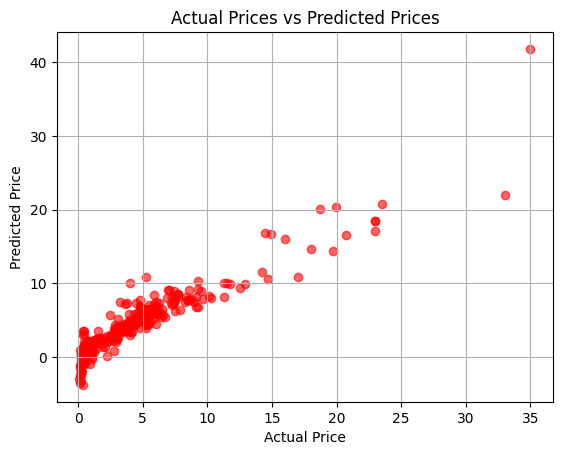

In [19]:
#plotting the data to visualize better
plt.scatter(Y_train, training_data_prediction, color='red', alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.grid(True)
plt.show()

In [20]:
# Predicting on the test data
test_data_prediction = model.predict(X_test)

In [21]:
# calculating the r2_score on test data
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ",(error_score))

R squared error:  0.8365766715027051


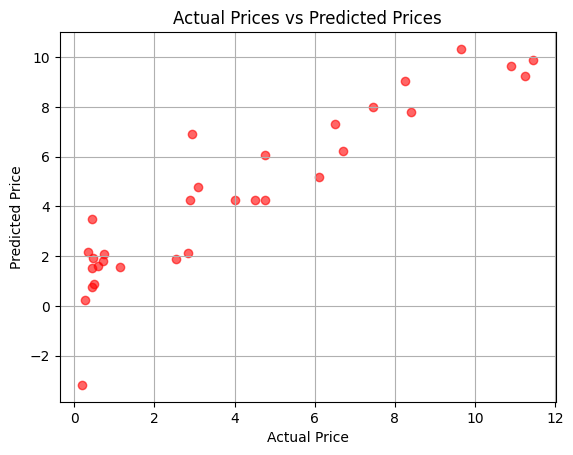

In [22]:
# plotting the test data
plt.scatter(Y_test, test_data_prediction, color='red', alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.grid(True)
plt.show()

In [44]:
friends_car = np.array([
    [2012, 6.98, 130000,	1,	1,	0, 1],
    [2014, 6.98, 150000,	1,	1,	0, 1],
    [2015, 6.18, 120000,	1,	1,	0, 1]])

friends_car_df = pd.DataFrame(friends_car, columns=X.columns)
prediction = model.predict(friends_car_df)
# print(prediction)
print("The predictions are as follows: ")
for j,i in enumerate(prediction):
  print(f'The selling price for the {j+1} car is {i:.3} Lakh')

The predictions are as follows: 
The selling price for the 1 car is 2.82 Lakh
The selling price for the 2 car is 3.51 Lakh
The selling price for the 3 car is 3.77 Lakh
